# Turning Bullish

### Data Profiling

In [1]:
# Importing Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Loading Dataset

path = '../Data/SPY_close_price_5Y.csv'

spy = pd.read_csv(path, parse_dates=['Date']).set_index('Date').sort_index()

spy.head()

,Close
Date,
2020-11-02,330.20
2020-11-03,336.03
2020-11-04,343.54
2020-11-05,350.24
2020-11-06,350.16


In [3]:
# Checking memory usage

spy.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2020-11-02 to 2025-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1256 non-null   float64
dtypes: float64(1)
memory usage: 19.6 KB


In [4]:
# Checking Statics

spy.describe()

,Close
count,1256.000000
mean,474.301019
std,84.147950
min,330.200000
25%,410.672500
50%,446.160000
75%,544.777500
max,687.390000


In [5]:
# Checking Null Values

spy.isna().sum()

Close    0
dtype: int64

In [6]:
# Checking Duplicate values

spy.duplicated().sum()

29

In [7]:
# Calculating moving averages

spy = spy.assign(
    avg_50_days = spy.rolling(50).mean(),
    avg_90_days = spy.rolling(90).mean(),
    golden_cross = lambda x : np.where(x['avg_50_days'] < x['avg_90_days'], 0, 1))


In [8]:
spy.head()

,Close,avg_50_days,avg_90_days,golden_cross
Date,,,,
2020-11-02,330.20,NaN,NaN,1
2020-11-03,336.03,NaN,NaN,1
2020-11-04,343.54,NaN,NaN,1
2020-11-05,350.24,NaN,NaN,1
2020-11-06,350.16,NaN,NaN,1


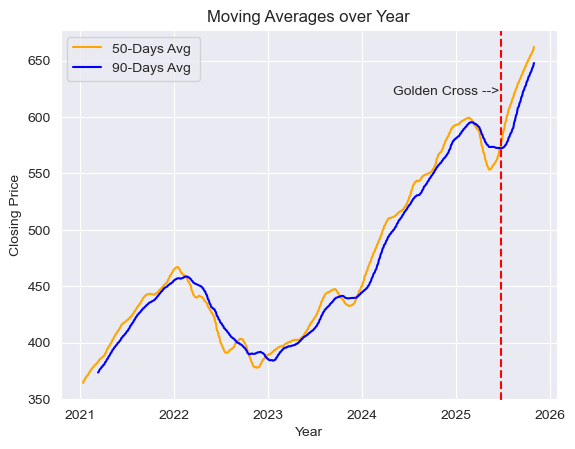

In [10]:
# Plotting Line Chart

# Setting Chart Style
sns.set_style('darkgrid')

fig,ax = plt.subplots()

ax.plot(
    spy.index,
    spy['avg_50_days'],
    color = 'orange',
    label = '50-Days Avg '
)

ax.plot(
    spy.index,
    spy['avg_90_days'],
    color = 'blue',
    label = '90-Days Avg'
)

ax.axvline(
    x = pd.Timestamp('2025-06-25'),
    color= 'red',
    linestyle = "--"
)

ax.annotate(
    'Golden Cross -->',
    xy = (pd.Timestamp('2025-05'),620),
    xytext =(pd.Timestamp('2024-05'),620), 
)


ax.legend()

# Adding Title and Labels
ax.set_title('Moving Averages over Year')
ax.set_xlabel('Year')
ax.set_ylabel('Closing Price')

plt.show()